# Telescope Observation: Sunny or Cloudy

#### **Sunny = 0**
#### **Cloudy = 1**

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import astroML.stats as astrostats

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 12

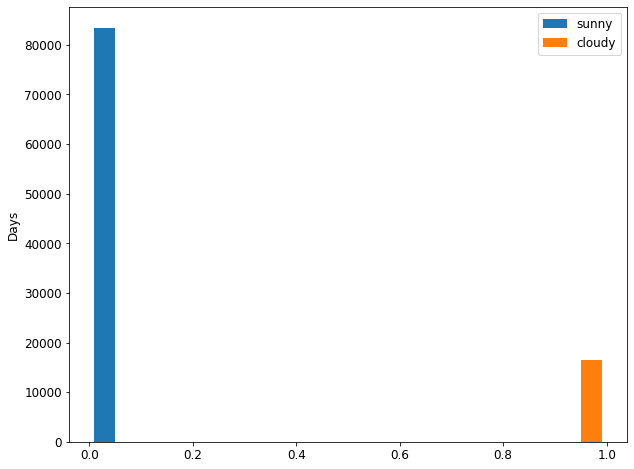

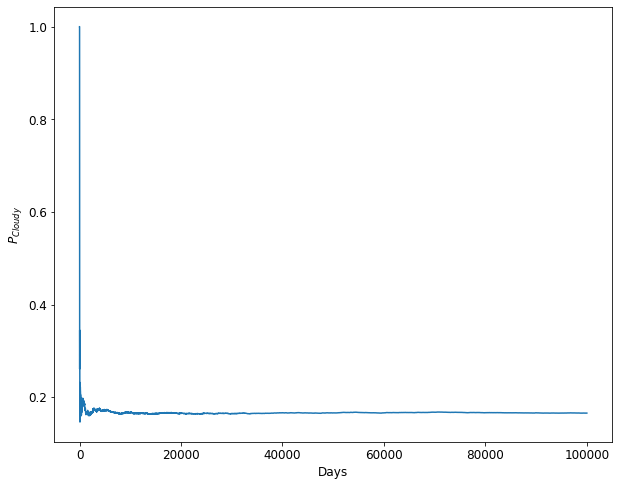

In [84]:
N = int(1e5)

days = np.array([0, 1])
prob_given_sunny = np.array([0.9, 0.1])
prob_given_cloudy = np.array([0.5, 0.5])

#Starting off on a cloudy day
forecast = [1]

for i in range(N):

    #Today is clear -> Tomorrow is cloudy at 10% or clear at 90%
    if (forecast[i] == 0):
        forecast.append(np.random.choice(days, p=prob_given_sunny))
    
    #Today is cloudy -> Tomorrow is cloudy at 50% or clear at 50%
    elif(forecast[i] == 1): 
        forecast.append(np.random.choice(days, p=prob_given_cloudy))
    
    #print(forecast[i+1])

forecast = np.array(forecast)

sunny = tuple([forecast == 0])
cloudy = tuple([forecast == 1])

plt.hist([forecast[sunny], forecast[cloudy]], label=['sunny', 'cloudy'])
plt.ylabel('Days')
plt.legend()
plt.show()

#Cumulative Sum Trace. Dividing by an array of lengtht shape + 1 since I arange from 1 and not from 0
traceplot = np.cumsum(forecast)/(np.arange(1, forecast.shape[0]+1))


plt.xlabel('Days')
plt.ylabel(r'$P_{Cloudy}$')
plt.plot(traceplot);

Raw Data:
Median value: 0.16713.
Sigma: 0.00054.


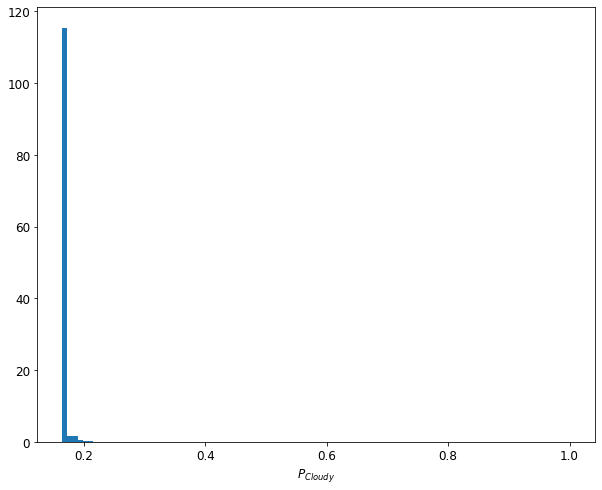

In [79]:
#Summary statistics on raw data
copy = traceplot.copy()

raw_median = np.median(copy)
raw_sigma = astrostats.sigmaG(copy)

print('\033[1m''Raw Data:''\033[0m')
print('Median value: {:.5f}.\nSigma: {:.5f}.'.format(raw_median, raw_sigma))

plt.hist(copy, bins=100, density=True)
plt.xlabel(r'$P_{Cloudy}$')
plt.show();

Burning the first 2000 points:
Median value: 0.16711.
Sigma: 0.00053.


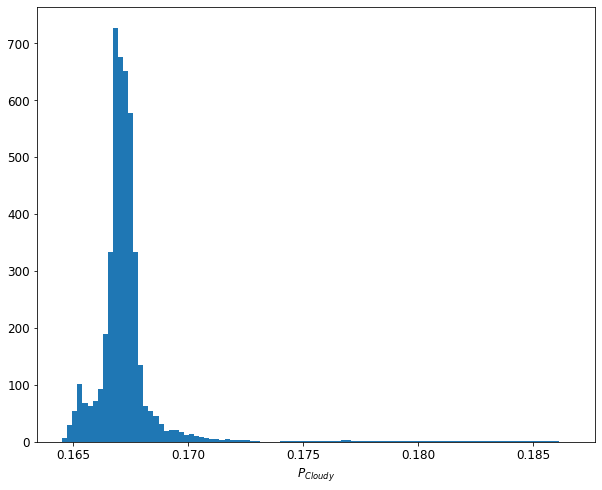

In [83]:
#Summary statistics after removing the burn-in phase
burn = 2000
reliable_days = copy[burn:]

burnt_median = np.median(reliable_days)
burnt_sigma = astrostats.sigmaG(reliable_days)
print('\033[1m''Burning the first {} points:''\033[0m'.format(burn))

print('Median value: {:.5f}.\nSigma: {:.5f}.'.format(burnt_median, burnt_sigma))

plt.hist(reliable_days, bins=100, density=True)
plt.xlabel(r'$P_{Cloudy}$')
plt.show();